In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
import requests



In [8]:
coindeskURL = 'https://api.coindesk.com/v1/bpi/historical/close.json?'

In [76]:
pd.set_option('display.max_rows', 1500)

In [3]:
start = datetime.date(2017,1,1)
end   = datetime.date(2020,7,2)

In [23]:
url = f'{coindeskURL}start={start:%Y-%m-%d}&end={end:%Y-%m-%d}'

In [24]:
result = requests.get(url)

In [25]:
result.content

b'{"bpi":{"2017-01-01":997.6888,"2017-01-02":1018.05,"2017-01-03":1030.8175,"2017-01-04":1129.87,"2017-01-05":1005.815,"2017-01-06":895.67,"2017-01-07":905.17,"2017-01-08":913.5238,"2017-01-09":899.35,"2017-01-10":904.7925,"2017-01-11":775.9813,"2017-01-12":802.8288,"2017-01-13":826.1213,"2017-01-14":818.6388,"2017-01-15":822.4225,"2017-01-16":830.2638,"2017-01-17":904.4538,"2017-01-18":884.2513,"2017-01-19":898.0213,"2017-01-20":891.6238,"2017-01-21":920.0113,"2017-01-22":925.3313,"2017-01-23":912.6875,"2017-01-24":885.6475,"2017-01-25":894.11,"2017-01-26":915.1,"2017-01-27":918.5625,"2017-01-28":920.28,"2017-01-29":914.0438,"2017-01-30":920.2413,"2017-01-31":967.6675,"2017-02-01":987.3463,"2017-02-02":1007.795,"2017-02-03":1018.1113,"2017-02-04":1033.6525,"2017-02-05":1013.9938,"2017-02-06":1024.6125,"2017-02-07":1052.5388,"2017-02-08":1054.3438,"2017-02-09":988.9475,"2017-02-10":993.0788,"2017-02-11":1010.0025,"2017-02-12":999.5125,"2017-02-13":996.8575,"2017-02-14":1009.2513,"2017-

In [33]:
df = pd.read_json(result.content).iloc[:-2,:1]
df.index.name = 'date'
df.index = pd.to_datetime(df.index)

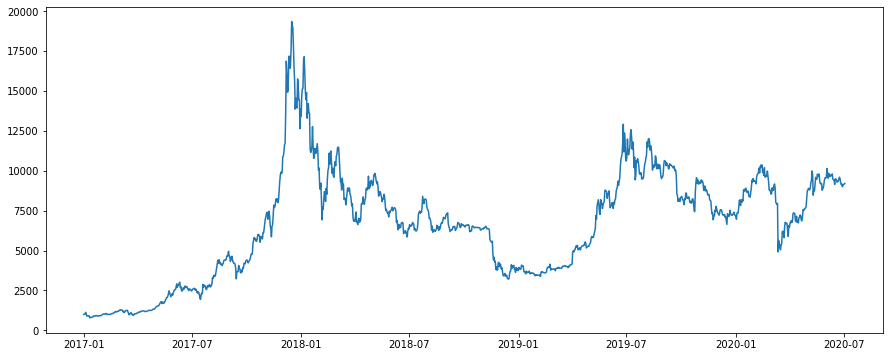

In [40]:
plt.figure(figsize=(15,6))
plt.plot(df)

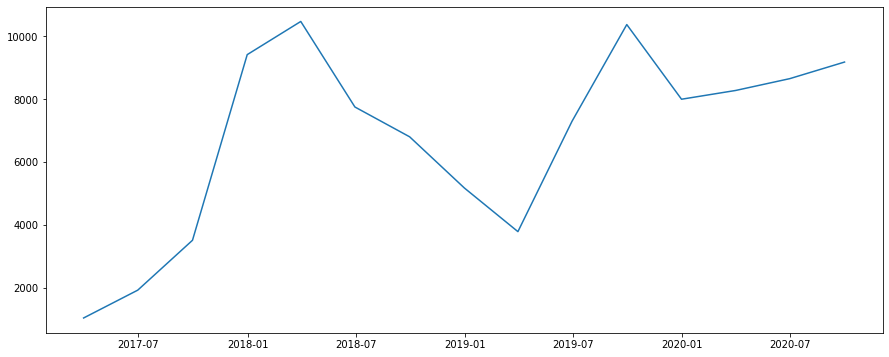

In [45]:
plt.figure(figsize=(15,6))
plt.plot(df.resample('Q').mean())

In [46]:
plt.figure(figsize=(15,6))
plt.plot(df.resample('Q').mean())

,bpi
date,
2017-01-01,997.6888
2017-01-02,1018.0500
2017-01-03,1030.8175
2017-01-04,1129.8700
2017-01-05,1005.8150
...,...
2020-06-28,8991.5000
2020-06-29,9096.1500
2020-06-30,9144.3850


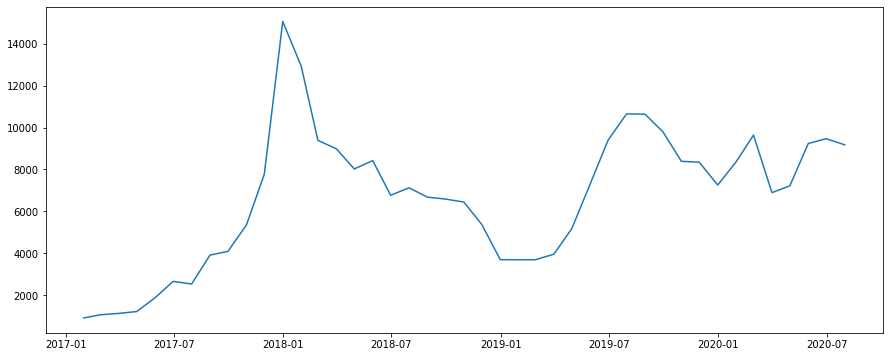

In [47]:
plt.figure(figsize=(15,6))
plt.plot(df.resample('M').mean())

In [48]:
df[:5].diff()

,bpi
date,
2017-01-01,NaN
2017-01-02,20.3612
2017-01-03,12.7675
2017-01-04,99.0525
2017-01-05,-124.0550


In [50]:
df[:5].diff(2)

,bpi
date,
2017-01-01,NaN
2017-01-02,NaN
2017-01-03,33.1287
2017-01-04,111.8200
2017-01-05,-25.0025


No handles with labels found to put in legend.


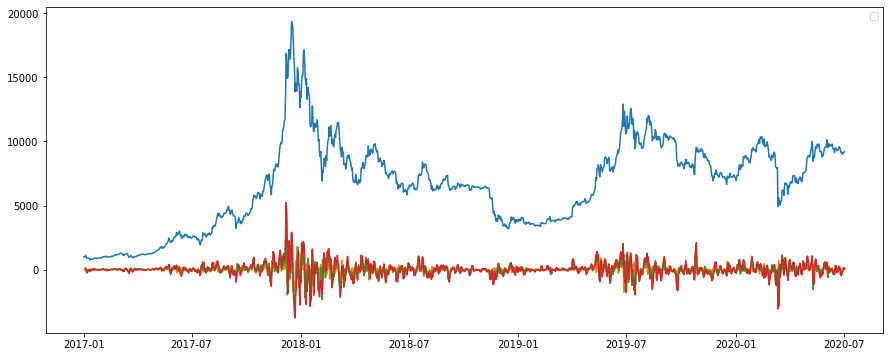

In [57]:
plt.figure(figsize=(15,6))
plt.plot(pd.concat([df['bpi'], df['bpi'].diff(),df['bpi'].diff(2),df['bpi'].diff(3)], axis=1))
plt.legend()

In [59]:
df[:5].shift()

,bpi
date,
2017-01-01,NaN
2017-01-02,997.6888
2017-01-03,1018.0500
2017-01-04,1030.8175
2017-01-05,1129.8700


In [60]:
# Shift the timing
df[:5].tshift(2)

,bpi
date,
2017-01-03,997.6888
2017-01-04,1018.0500
2017-01-05,1030.8175
2017-01-06,1129.8700
2017-01-07,1005.8150


In [61]:
# same as diff(1) function
df[:5]-df[:5].shift()

,bpi
date,
2017-01-01,NaN
2017-01-02,20.3612
2017-01-03,12.7675
2017-01-04,99.0525
2017-01-05,-124.0550


In [78]:
# rolling function takes the average of the given window data points
df.rolling(window=10).mean().shift(1)

,bpi
date,
2017-01-01,NaN
2017-01-02,NaN
2017-01-03,NaN
2017-01-04,NaN
2017-01-05,NaN
2017-01-06,NaN
2017-01-07,NaN
2017-01-08,NaN
2017-01-09,NaN


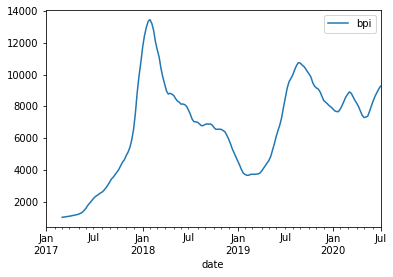

In [79]:
df.resample('W').mean().rolling(window=10).mean().plot()

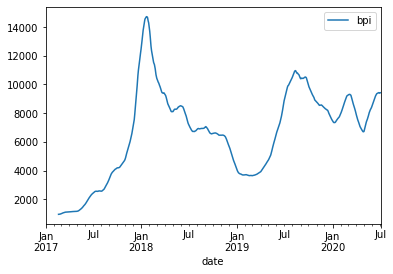

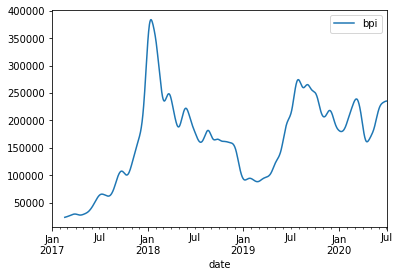

In [82]:
df.rolling(window=50).mean().plot()
df.rolling(window=50,win_type='gaussian').sum(std=10).plot()

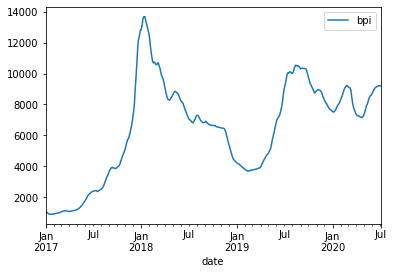

In [83]:
df.ewm(span=50).mean().plot()

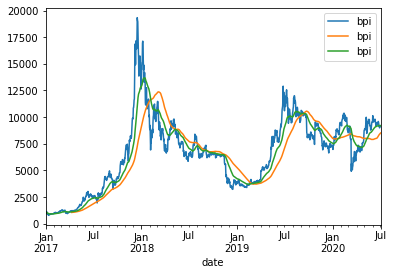

In [84]:
pd.concat([df,df.rolling(window=100).mean(), df.ewm(span=50).mean()],axis=1).plot()

In [85]:
df.groupby(df.index.dayofweek).mean()

,bpi
date,
0,6612.779266
1,6612.821919
2,6615.719704
3,6595.242466
4,6621.517746
5,6636.877807
6,6588.415989


In [86]:
df.groupby(df.index.month).mean()

,bpi
date,
1,6474.960095
2,5979.032653
3,5241.117152
4,5408.169478
5,6715.698325
6,7074.233533
7,6820.423568
8,7077.441969
9,6825.175222


In [87]:
df.groupby(df.index.year).mean()

,bpi
date,
2017,3990.138147
2018,7529.385702
2019,7379.960562
2020,8468.953262


In [89]:
df[:5].cumsum()

,bpi
date,
2017-01-01,997.6888
2017-01-02,2015.7388
2017-01-03,3046.5563
2017-01-04,4176.4263
2017-01-05,5182.2413


In [90]:
df[:5]

,bpi
date,
2017-01-01,997.6888
2017-01-02,1018.0500
2017-01-03,1030.8175
2017-01-04,1129.8700
2017-01-05,1005.8150


In [95]:
df[:5].pct_change(2)

,bpi
date,
2017-01-01,NaN
2017-01-02,NaN
2017-01-03,0.033205
2017-01-04,0.109837
2017-01-05,-0.024255


In [97]:
#same as cumcm but here we can do mean median other stuff too
df[:5].expanding().sum()

,bpi
date,
2017-01-01,997.6888
2017-01-02,2015.7388
2017-01-03,3046.5563
2017-01-04,4176.4263
2017-01-05,5182.2413


In [98]:
df[:5].expanding().mean()

,bpi
date,
2017-01-01,997.688800
2017-01-02,1007.869400
2017-01-03,1015.518767
2017-01-04,1044.106575
2017-01-05,1036.448260
